In [8]:
# import libraries
from dateparser.search import search_dates
import re
import json
import requests
import pandas as pd 
import datefinder
from tqdm import tqdm
import numpy as np
import datetime
import pytz
import spacy
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import time
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from tqdm import tqdm
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import json
import requests
from sklearn.manifold import TSNE
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [7]:
# Read Medical Reports in form of Embedding
data = pd.read_csv(r'/Users/kavanp/Downloads/Patient_level_embbedding.csv')
data = data.drop('Unnamed: 0',axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.000176,0.038358,0.479511,-0.055392,0.019926,0.004402,0.366312,-0.003908,-0.046752,-0.206512,...,-0.163484,-0.064185,0.032464,-0.368687,-0.132451,-0.257599,-0.314788,0.252097,0.053476,0.086191
1,-0.097689,0.114015,0.595259,-0.016969,0.123000,-0.133908,0.487941,-0.055932,0.091366,-0.270243,...,-0.133348,-0.020967,0.014773,-0.396714,-0.207757,-0.201021,-0.165117,0.325117,0.065146,0.079286
2,-0.022412,0.105121,0.775163,-0.046493,0.103107,-0.134064,0.370950,-0.110927,0.026253,-0.276663,...,-0.049874,0.055490,0.014830,-0.133719,-0.034076,-0.170400,-0.317479,0.269969,-0.027467,0.104408
3,-0.069422,-0.058815,0.790402,0.015993,0.035467,-0.146112,0.277932,0.030284,0.080389,-0.414891,...,-0.159513,0.069639,0.075671,-0.320848,-0.192323,-0.049663,-0.305554,0.336392,-0.020898,0.051725
4,-0.073010,0.099101,0.605883,-0.103776,0.166971,-0.150465,0.278244,0.118420,0.064581,-0.314440,...,-0.083176,-0.018348,0.052129,-0.147279,-0.020554,-0.108470,-0.294984,0.286189,0.104839,0.125323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.032039,0.004340,0.779671,-0.017466,0.069143,-0.069090,0.365895,-0.111321,0.039062,-0.286843,...,-0.019601,0.065819,0.089296,-0.345393,-0.080354,-0.292395,-0.198857,0.328565,0.065751,0.007035
198,-0.035018,0.006117,0.500718,-0.023203,0.174470,-0.089675,0.437138,-0.140777,0.004767,-0.210990,...,-0.172379,0.048229,-0.116262,-0.194588,0.015832,-0.184382,-0.334065,0.244138,-0.033753,0.134627
199,-0.113063,0.046970,0.609660,0.044986,0.089037,-0.062052,0.409513,-0.106587,0.011884,-0.220898,...,-0.182701,-0.059363,-0.011998,-0.378404,-0.149096,-0.208884,-0.306685,0.282262,-0.029621,0.150501
200,-0.102074,0.036828,0.631947,-0.067358,0.134355,-0.083058,0.402090,-0.111136,0.024960,-0.352055,...,-0.085692,-0.027943,-0.096840,-0.208684,-0.016172,-0.218418,-0.265948,0.319335,0.039198,0.028322


In [10]:
# Import medical report and performn data cleaning
from xml.dom import minidom
import os
from tqdm import tqdm
text_list = []
output_list = []

path = '/Users/kavanp/Downloads/train'
for filename in tqdm(os.listdir(path)):
    if not filename.endswith('.xml'): continue
    fullname = os.path.join(path, filename)
    mydoc = minidom.parse(fullname)
    ot = mydoc.getElementsByTagName('ADVANCED-CAD')
    ip = mydoc.getElementsByTagName('TEXT')
    text_list.append(ip[0].firstChild.data)
    output_list.append(ot[0].attributes['met'].value)
    
cl_report = []
for report in tqdm(text_list):
    dump = (report.replace("\n", ""))
    dump1 = (dump.replace("_", ""))
    dump2 = (dump1.replace("*", ""))
    cl_report.append(dump2.replace("\t", ""))

100%|██████████| 202/202 [00:00<00:00, 11154.62it/s]


In [11]:
# Convert cleaned medical report into dataframe. 
d = {'Report':cl_report,'Outcome':output_list}
import pandas as pd
Df = pd.DataFrame(d)

In [14]:
# Perform feature selection to identify relevent features
clf = RandomForestClassifier(n_estimators=10)
trans = BorutaPy(clf, random_state=10, verbose=2,max_iter=100)
sel = trans.fit_transform(data.values, Df['Outcome'].values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	768
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	768
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	768
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	768
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	768
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	768
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	768
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	761
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	761
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	761
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	761
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	761
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	761
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	761
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	761
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	7


In [28]:
# Find index of selected features 
col_name = np.array(data.columns)
np.where(trans.support_ == True)[0].tolist()

[71, 227, 449, 590, 632, 650, 754]

In [32]:
# Based on selected feature index identify which words are they
List_of_words = np.array(data.columns)
Index_value = list(np.where(trans.support_ == True))
List_of_selected_words = (List_of_words[Index_value])
extracted_data = data[List_of_selected_words.tolist()]

<ipython-input-32-15bb4bdf7928>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  List_of_selected_words = (List_of_words[Index_value])


array(['71', '227', '449', '590', '632', '650', '754'], dtype=object)

In [49]:
# create a function that reduce that dimension using T-Sne and also plot graph based on reduced dimension
# this function require various input first is number of loop, perplexity, increase loop by, starting iteration and 
# increment iteration.
def Dimensionality_reduction_tsne(Number_Loop_P,Starting_perplexity_P,Increment_by_P,Number_Loop_I,Start_itr,Inc_itr):
    for i in range(Number_Loop_I):
        for i in range(Number_Loop_P):
            print(" T-SNE Plot with Perplexity Value =", Starting_perplexity_P, Start_itr)
            m = TSNE(n_components = 2 ,random_state= 0, perplexity =Starting_perplexity_P,early_exaggeration=10,learning_rate=900,n_iters=Start_itr)
            tsne_features = m.fit_transform(extracted_data)
            x = tsne_features[:,0]
            y = tsne_features[:,1]
            import seaborn as sns
            sns.scatterplot(x=x,y=y, hue=Df['Outcome'])
            plt.show()
            Starting_perplexity_P = Starting_perplexity_P + Increment_by_P
        Start_itr = Start_itr+Inc_itr

 T-SNE Plot with Perplexity Value = 6 10


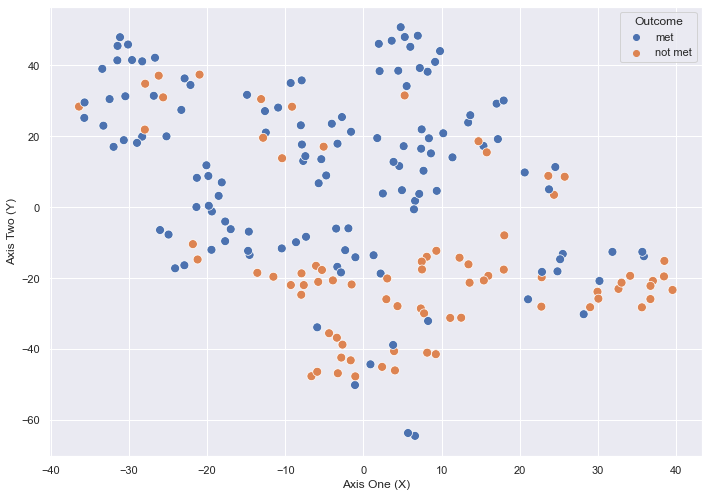

In [180]:
# Using this function Dimensionality reduction t-sne we have visualize the cohort of Advanced CAD based on patients.
Dimensionality_reduction_tsne(1,6,0,1,10,0)